In [402]:
import numpy as np
import pandas as pd
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt 
import os

# Part 1

## Task 1

In [441]:
# Reading train and test
train = pd.DataFrame(columns=['feature','label'])
test = pd.DataFrame(columns=['feature','label'])
label = "cat"
train_path = ['C:/Users/Umar/Videos/ML/A2/training_set/cats/','C:/Users/Umar/Videos/ML/A2/training_set/dogs/']
test_path = ['C:/Users/Umar/Videos/ML/A2/test_set/cats/','C:/Users/Umar/Videos/ML/A2/test_set/dogs/']
for i,animal in enumerate(train_path):
    if (i==1):
        print('dog')
        label="dog"
    for img in os.listdir(animal):
        f_p = animal+img
        train = train.append({'feature':hog(cv2.resize(cv2.imread(f_p),(64,32))),'label':label},ignore_index=True)

print('test')

label = "cat"
for i,animal in enumerate(test_path):
    if (i==1):
        test.to_csv('test_cats')
        print('dog')
        label="dog"
    for img in os.listdir(animal):
        f_p = animal+img
        test = test.append({'feature':hog(cv2.resize(cv2.imread(f_p),(64,32))),'label':label},ignore_index=True)


C:\Users\Umar\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


dog
test
dog


In [442]:
def knn(t,tes,k,d_metric):
    train = t.to_numpy()
    test = tes.to_numpy()
    predicted_labels = []
    for i2 in range(2000):
        t2=t.copy()
        dist=[]
        for i1 in range(8000):
            d=0
            if (d_metric=="euclidean"):
                d = np.sqrt(np.sum(np.square(train[i1][0] - test[i2][0])))
            elif (d_metric == "manhattan"):
                d = np.sum(np.abs(train[i1][0] - test[i2][0]))
            dist.append(d)
        t2['dist']=dist
        t2.sort_values('dist',inplace=True)
        k_values = t2[:k]
        z=1
        while(len(k_values.label.mode()) != 1):
            k_values = t2[:k-z]
            z = z+1
        predicted_labels.append(k_values.label.mode()[0])
    return predicted_labels

In [443]:
predict = []
for d in ["euclidean","manhattan"]:
    for k in range(1,8):
        print("k=",k)
        predict.append(knn(train,test,k,d))

k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7


In [604]:
print("Classification Accuracy:")
acc=[]
print('Euclidean')
for x in range(14):
    acc.append(sum(predict[x]==test.label)/2000)
    if(x==7):
        print('Manhattan')
    if x<7:
        print("Accuracy for k =",x+1, "is", acc[x])
    else:
        print("Accuracy for k =",x-7, "is", acc[x])

Classification Accuracy:
Euclidean
Accuracy for k = 1 is 0.6055
Accuracy for k = 2 is 0.6055
Accuracy for k = 3 is 0.6065
Accuracy for k = 4 is 0.6065
Accuracy for k = 5 is 0.602
Accuracy for k = 6 is 0.602
Accuracy for k = 7 is 0.598
Manhattan
Accuracy for k = 0 is 0.6035
Accuracy for k = 1 is 0.6035
Accuracy for k = 2 is 0.625
Accuracy for k = 3 is 0.625
Accuracy for k = 4 is 0.6345
Accuracy for k = 5 is 0.6345
Accuracy for k = 6 is 0.6365


In [445]:
predict_1 = pd.DataFrame(test.label)
predict_1['e1'] = predict[0]
predict_1['e2'] = predict[1]
predict_1['e3'] = predict[2]
predict_1['e4'] = predict[3]
predict_1['e5'] = predict[4]
predict_1['e6'] = predict[5]
predict_1['e7'] = predict[6]
predict_1['m1'] = predict[7]
predict_1['m2'] = predict[8]
predict_1['m3'] = predict[9]
predict_1['m4'] = predict[10]
predict_1['m5'] = predict[11]
predict_1['m6'] = predict[12]
predict_1['m7'] = predict[13]

In [446]:
tp=[0]*14
fp=[0]*14
fn=[0]*14
tn=[0]*14
for i,x in predict_1.iterrows():
    true = x[0]
    for y in range(len(x)):
        if(y==0):
            continue
        if((true=='cat') and (true==x[y])):
            tp[y-1] = tp[y-1]+1
        if((true=='cat') and (true!=x[y])):
            fp[y-1] = fp[y-1]+1
        if((true=='dog') and (true==x[y])):
            tn[y-1] = tn[y-1]+1
        if((true=='dog') and (true!=x[y])):
            fn[y-1] = fn[y-1]+1

In [447]:
precision=[0]*14
recall=[0]*14
for x in range(14):
    precision[x] = tp[x]/(tp[x]+fp[x])
    recall[x] = tp[x]/(tp[x]+fn[x])

In [448]:
f1_s=[0]*14
for x in range(14):
    f1_s[x] = 2*((precision[x]*recall[x])/(precision[x]+recall[x]))

In [449]:
print('F1 scores:')
print('Euclidean:')
for x in range(14):
    if(x==7):
        print('Manhattan:')
    if x<7:
        print("F1 for k =",x+1, "is", f1_s[x])
    else:
        print("F1 for k =",x-7, "is", f1_s[x])

F1 scores:
Euclidean:
F1 for k = 1 is 0.5120593692022263
F1 for k = 2 is 0.5120593692022263
F1 for k = 3 is 0.46132785763175904
F1 for k = 4 is 0.46132785763175904
F1 for k = 5 is 0.433048433048433
F1 for k = 6 is 0.433048433048433
F1 for k = 7 is 0.4079528718703977
Manhattan:
F1 for k = 0 is 0.5220012055455094
F1 for k = 1 is 0.5220012055455094
F1 for k = 2 is 0.5192307692307692
F1 for k = 3 is 0.5192307692307692
F1 for k = 4 is 0.5162144275314361
F1 for k = 5 is 0.5162144275314361
F1 for k = 6 is 0.5044308111792775


### F1 score is a better metric because it also focuses on the predictions which are wrong (false positive and false negative). On the other hand accuracy only focuses on tru negative and true positives.

In [450]:
conf_t1=[]
for x in range(14):
    conf_t1.append([[tp[x],fp[x]],[fn[x],tn[x]]])

In [451]:
print('Confussion Matrix:')
print('Euclidean')
for x in range(14):
    if(x==7):
        print('Manhatan')
    if x<7:
        print("Confussion Matrix for k =",x, "is", conf_t1[x])
    else:
        print("Confussion Matrix for k =",x-7, "is", conf_t1[x])

Confussion Matrix:
Euclidean
Confussion Matrix for k = 0 is [[414, 586], [203, 797]]
Confussion Matrix for k = 1 is [[414, 586], [203, 797]]
Confussion Matrix for k = 2 is [[337, 663], [124, 876]]
Confussion Matrix for k = 3 is [[337, 663], [124, 876]]
Confussion Matrix for k = 4 is [[304, 696], [100, 900]]
Confussion Matrix for k = 5 is [[304, 696], [100, 900]]
Confussion Matrix for k = 6 is [[277, 723], [81, 919]]
Manhatan
Confussion Matrix for k = 0 is [[433, 567], [226, 774]]
Confussion Matrix for k = 1 is [[433, 567], [226, 774]]
Confussion Matrix for k = 2 is [[405, 595], [155, 845]]
Confussion Matrix for k = 3 is [[405, 595], [155, 845]]
Confussion Matrix for k = 4 is [[390, 610], [121, 879]]
Confussion Matrix for k = 5 is [[390, 610], [121, 879]]
Confussion Matrix for k = 6 is [[370, 630], [97, 903]]


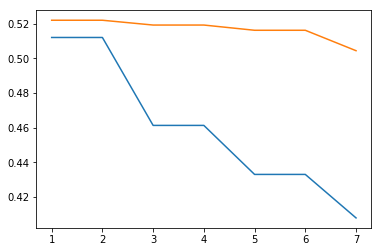

In [452]:
plt.plot([1,2,3,4,5,6,7],f1_s[:7])
plt.plot([1,2,3,4,5,6,7],f1_s[7:])

## Task 2

In [377]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

In [225]:
knn_xtrain = train.feature.tolist()
knn_ytrain = train.label.tolist()
knn_xtest = test.feature.tolist()

In [230]:
knn_predict = []
for d in ["euclidean","manhattan"]:
    for k in range(1,8):
        print("k=",k)
        knn = KNeighborsClassifier(k,n_jobs=-1,metric=d)
        knn.fit(knn_xtrain,knn_ytrain)
        knn_predict.append(knn.predict(knn_xtest))

k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7


In [231]:
sk_results=[]
for x in range(14):
    sk_results.append(sum(knn_predict[x]==test.label)/2000)
sk_results

[0.6055,
 0.6405,
 0.6065,
 0.6235,
 0.602,
 0.6225,
 0.598,
 0.6035,
 0.623,
 0.625,
 0.6465,
 0.6345,
 0.6535,
 0.6365]

In [389]:
f1_t2=[]
acc_t2=[]
conf_t2=[]
for x in knn_predict:
    f1_t2.append(f1_score(test.label,x,pos_label='cat'))
    acc_t2.append(accuracy_score(test.label,x))
    conf_t2.append(confusion_matrix(test.label,x))    

In [605]:
print("Classification Accuracy:")
acc=[]
print('Euclidean')
for x in range(14):
    if(x==7):
        print('Manhattan')
    if x<7:
        print("Accuracy for k =",x+1, "is", acc_t2[x])
    else:
        print("Accuracy for k =",x-7, "is", acc_t2[x])

Classification Accuracy:
Euclidean
Accuracy for k = 1 is 0.6055
Accuracy for k = 2 is 0.6405
Accuracy for k = 3 is 0.6065
Accuracy for k = 4 is 0.6235
Accuracy for k = 5 is 0.602
Accuracy for k = 6 is 0.6225
Accuracy for k = 7 is 0.598
Manhattan
Accuracy for k = 0 is 0.6035
Accuracy for k = 1 is 0.623
Accuracy for k = 2 is 0.625
Accuracy for k = 3 is 0.6465
Accuracy for k = 4 is 0.6345
Accuracy for k = 5 is 0.6535
Accuracy for k = 6 is 0.6365


In [606]:
print('F1 scores:')
print('Euclidean:')
for x in range(14):
    if(x==7):
        print('Manhattan:')
    if x<7:
        print("F1 for k =",x+1, "is", f1_t2[x])
    else:
        print("F1 for k =",x-7, "is", f1_t2[x])

F1 scores:
Euclidean:
F1 for k = 1 is 0.5120593692022263
F1 for k = 2 is 0.6253256904637832
F1 for k = 3 is 0.46132785763175904
F1 for k = 4 is 0.5455642727821364
F1 for k = 5 is 0.433048433048433
F1 for k = 6 is 0.5106934543097861
F1 for k = 7 is 0.4079528718703977
Manhattan:
F1 for k = 0 is 0.5220012055455094
F1 for k = 1 is 0.6211055276381908
F1 for k = 2 is 0.5192307692307692
F1 for k = 3 is 0.6039215686274509
F1 for k = 4 is 0.5162144275314361
F1 for k = 5 is 0.5857740585774058
F1 for k = 6 is 0.5044308111792775


In [427]:
print('Confussion Matrix:')
print('Euclidean')
for x in range(14):
    if(x==7):
        print('Manhatan')
    if x<7:
        print("Confussion Matrix for k=",x, "is")
        print(conf_t2[x])
    else:
        print("Confussion Matrix for k =",x-7, "is")
        print(conf_t2[x])

Confussion Matrix:
Euclidean
Confussion Matrix for k= 0 is
[[414 586]
 [203 797]]
Confussion Matrix for k= 1 is
[[600 400]
 [319 681]]
Confussion Matrix for k= 2 is
[[337 663]
 [124 876]]
Confussion Matrix for k= 3 is
[[452 548]
 [205 795]]
Confussion Matrix for k= 4 is
[[304 696]
 [100 900]]
Confussion Matrix for k= 5 is
[[394 606]
 [149 851]]
Confussion Matrix for k= 6 is
[[277 723]
 [ 81 919]]
Manhatan
Confussion Matrix for k = 0 is
[[433 567]
 [226 774]]
Confussion Matrix for k = 1 is
[[618 382]
 [372 628]]
Confussion Matrix for k = 2 is
[[405 595]
 [155 845]]
Confussion Matrix for k = 3 is
[[539 461]
 [246 754]]
Confussion Matrix for k = 4 is
[[390 610]
 [121 879]]
Confussion Matrix for k = 5 is
[[490 510]
 [183 817]]
Confussion Matrix for k = 6 is
[[370 630]
 [ 97 903]]


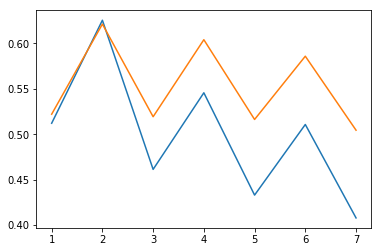

In [408]:
plt.plot([1,2,3,4,5,6,7],f1_t2[:7])
plt.plot([1,2,3,4,5,6,7],f1_t2[7:])

## Task 3

In [413]:
# Reading train and test
train_part3 = pd.DataFrame(columns=['feature','label'])
test_part3 = pd.DataFrame(columns=['feature','label'])
label = "Cloudy"
train_path_part3 = ['C:/Users/Umar/Videos/ML/A2/training_data/Cloudy/','C:/Users/Umar/Videos/ML/A2/training_data/Rain/','C:/Users/Umar/Videos/ML/A2/training_data/Shine/','C:/Users/Umar/Videos/ML/A2/training_data/Sunrise/']
test_path_part3 = ['C:/Users/Umar/Videos/ML/A2/test_data/Cloudy/','C:/Users/Umar/Videos/ML/A2/test_data/Rain/','C:/Users/Umar/Videos/ML/A2/test_data/Shine/','C:/Users/Umar/Videos/ML/A2/test_data/Sunrise/']
for i,season in enumerate(train_path_part3):
    if (i==1):
        print('Rain')
        label="Rain"
    elif(i==2):
        print('Shine')
        label="Shine"
    elif(i==3):
        print('Sunrise')
        label="Sunrise"
    for img in os.listdir(season):
        f_p = season+img
        train_part3 = train_part3.append({'feature':cv2.resize(cv2.imread(f_p),(32,32)).flatten(),'label':label},ignore_index=True)

print('test')

label = "Cloudy"
for i,season in enumerate(test_path_part3):
    if (i==1):
        print('Rain')
        label="Rain"
    elif(i==2):
        print('Shine')
        label="Shine"
    elif(i==3):
        print('Sunrise')
        label="Sunrise"
    for img in os.listdir(season):
        f_p = season+img
        test_part3 = test_part3.append({'feature':cv2.resize(cv2.imread(f_p),(32,32)).flatten(),'label':label},ignore_index=True)

Rain
Shine
Sunrise
test
Rain
Shine
Sunrise


In [600]:
def knn_part3(t,tes,k,d_metric,classes):
    train = t.to_numpy()
    test = tes.to_numpy()
    predicted_labels = []
    for i2 in range(224):
        t2=t.copy()
        dist=[]
        for i1 in range(899):
            d=0
            if (d_metric=="euclidean"):
                d = np.sqrt(np.sum(np.square(train[i1][0] - test[i2][0])))
            elif (d_metric == "manhattan"):
                d = np.sum(np.abs(train[i1][0] - test[i2][0]))
            dist.append(d)
        t2['dist']=dist
        t2.sort_values('dist',inplace=True)
        k_values = t2[:k]
        z=1
        while(len(k_values.label.mode()) != 1):
            k_values = t2[:k-z]
            z = z+1
        predicted_labels.append(k_values.label.mode()[0])
    return predicted_labels

In [601]:
predict_part3 = []
for d in ["euclidean","manhattan"]:
    for k in range(1,8):
        print("k=",k)
        predict_part3.append(knn_part3(train_part3,test_part3,k,d,4))

k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7


In [603]:
results_part3=[]
for x in range(14):
    results_part3.append(sum(predict_part3[x]==test_part3.label)/224)
print("Classification Accuracy:")
print('Euclidean')
for x in range(14):
    if(x==7):
        print('Manhattan')
    if x<7:
        print("Accuracy for k =",x+1, "is", results_part3[x])
    else:
        print("Accuracy for k =",x-7, "is", results_part3[x])

Classification Accuracy:
Euclidean
Accuracy for k = 1 is 0.6383928571428571
Accuracy for k = 2 is 0.6383928571428571
Accuracy for k = 3 is 0.6116071428571429
Accuracy for k = 4 is 0.6071428571428571
Accuracy for k = 5 is 0.6205357142857143
Accuracy for k = 6 is 0.6160714285714286
Accuracy for k = 7 is 0.5803571428571429
Manhattan
Accuracy for k = 0 is 0.6160714285714286
Accuracy for k = 1 is 0.6160714285714286
Accuracy for k = 2 is 0.6116071428571429
Accuracy for k = 3 is 0.6116071428571429
Accuracy for k = 4 is 0.6026785714285714
Accuracy for k = 5 is 0.5892857142857143
Accuracy for k = 6 is 0.5758928571428571


In [578]:
predict_3 = pd.DataFrame(test_part3.label)
predict_3['e1'] = predict_part3[0]
predict_3['e2'] = predict_part3[1]
predict_3['e3'] = predict_part3[2]
predict_3['e4'] = predict_part3[3]
predict_3['e5'] = predict_part3[4]
predict_3['e6'] = predict_part3[5]
predict_3['e7'] = predict_part3[6]
predict_3['m1'] = predict_part3[7]
predict_3['m2'] = predict_part3[8]
predict_3['m3'] = predict_part3[9]
predict_3['m4'] = predict_part3[10]
predict_3['m5'] = predict_part3[11]
predict_3['m6'] = predict_part3[12]
predict_3['m7'] = predict_part3[13]

In [579]:
a=np.zeros((14,16))
for i,x in predict_3.iterrows():
    true = x[0]
    for y in range(len(x)):
        if(y==0):
            continue
        if((true=='Cloudy') and (true==x[y])):
            a[y-1][0] = a[y-1][0]+1
        if((true=='Cloudy') and ('Rain'==x[y])):
            a[y-1][1] = a[y-1][1]+1
        if((true=='Cloudy') and ('Shine'==x[y])):
            a[y-1][2] = a[y-1][2]+1
        if((true=='Cloudy') and ('Sunrise'==x[y])):
            a[y-1][3] = a[y-1][3]+1
            
        if((true=='Rain') and ('Cloudy'==x[y])):
            a[y-1][4] = a[y-1][5]+1
        if((true=='Rain') and (true==x[y])):
            a[y-1][5] = a[y-1][4]+1
        if((true=='Rain') and ('Shine'==x[y])):
            a[y-1][6] = a[y-1][6]+1
        if((true=='Rain') and ('Sunrise'==x[y])):
            a[y-1][7] = a[y-1][7]+1
        
        if((true=='Shine') and ('Cloudy'==x[y])):
            a[y-1][8] = a[y-1][8]+1
        if((true=='Shine') and ('Rain'==x[y])):
            a[y-1][9] = a[y-1][9]+1
        if((true=='Shine') and (true==x[y])):
            a[y-1][10] = a[y-1][10]+1
        if((true=='Shine') and ('Sunrise'==x[y])):
            a[y-1][11] = a[y-1][11]+1
        
        if((true=='Sunrise') and ('Cloudy'==x[y])):
            a[y-1][12] = a[y-1][12]+1
        if((true=='Sunrise') and ('Rain'==x[y])):
            a[y-1][13] = a[y-1][13]+1
        if((true=='Sunrise') and ('Shine'==x[y])):
            a[y-1][14] = a[y-1][14]+1
        if((true=='Sunrise') and (true==x[y])):
            a[y-1][15] = a[y-1][15]+1

In [580]:
# precision
p_3=np.zeros((14,4))
row=0
for kth in a:
    p_3[row][0]=kth[0]/sum(kth[:4]) 
    p_3[row][1]=kth[5]/sum(kth[4:8]) 
    p_3[row][2]=kth[10]/sum(kth[8:12]) 
    p_3[row][3]=kth[15]/sum(kth[12:16]) 
    row=row+1

In [581]:
p_3

array([[0.38333333, 0.31578947, 0.70588235, 0.92957746],
       [0.61666667, 0.38888889, 0.62745098, 0.87323944],
       [0.5       , 0.43181818, 0.54901961, 0.94366197],
       [0.38333333, 0.34375   , 0.64705882, 0.95774648],
       [0.38333333, 0.40625   , 0.68627451, 0.91549296],
       [0.46666667, 0.36842105, 0.62745098, 0.92957746],
       [0.45      , 0.35897436, 0.56862745, 0.91549296],
       [0.48333333, 0.38235294, 0.7254902 , 0.71830986],
       [0.63333333, 0.43589744, 0.70588235, 0.63380282],
       [0.48333333, 0.38235294, 0.7254902 , 0.69014085],
       [0.5       , 0.35483871, 0.7254902 , 0.63380282],
       [0.48333333, 0.38235294, 0.70588235, 0.67605634],
       [0.46666667, 0.37142857, 0.68627451, 0.64788732],
       [0.45      , 0.37142857, 0.66666667, 0.63380282]])

In [587]:
# precision
r_3=np.zeros((14,4))
row=0
for kth in a:
    r_3[row][0]=kth[0]/sum(kth[[0,4,8,12]]) 
    r_3[row][1]=kth[5]/sum(kth[[1,5,9,13]]) 
    r_3[row][2]=kth[10]/sum(kth[[2,6,10,14]]) 
    r_3[row][3]=kth[15]/sum(kth[[3,7,11,15]]) 
    row=row+1

In [585]:
# f1_score
f1_3=[]
for x in range(14):
    p = p_3[x].mean()
    r = r_3[x].mean()
    f1_3.append(2*(p*r)/(p+r))

In [586]:
print('F1 scores:')
print('Euclidean:')
for x in range(14):
    if(x==7):
        print('Manhattan:')
    if x<7:
        print("F1 for k =",x+1, "is", f1_3[x])
    else:
        print("F1 for k =",x-7, "is", f1_3[x])

F1 scores:
Euclidean:
F1 for k = 1 is 0.5995803768777117
F1 for k = 2 is 0.6364663864720149
F1 for k = 3 is 0.637917869279189
F1 for k = 4 is 0.602897238584565
F1 for k = 5 is 0.6113482644078669
F1 for k = 6 is 0.6188882376507421
F1 for k = 7 is 0.6021005306326364
Manhattan:
F1 for k = 0 is 0.5764928158159248
F1 for k = 1 is 0.6051602089871494
F1 for k = 2 is 0.571188596934809
F1 for k = 3 is 0.5586198665894698
F1 for k = 4 is 0.5672498553237324
F1 for k = 5 is 0.5463994299110906
F1 for k = 6 is 0.5343421384518279


In [594]:
conf_t3=[]
for x in range(14):
    c1=[]
    c3=[]
    for y in range(16):
        c1.append(a[x][y])
        if((y+1)%4==0):
            c3.append(c1)
            c1=[]
    conf_t3.append(c3)

In [595]:
conf_t3

[[[23.0, 11.0, 3.0, 23.0],
  [11.0, 12.0, 4.0, 11.0],
  [2.0, 2.0, 36.0, 11.0],
  [2.0, 3.0, 0.0, 66.0]],
 [[37.0, 10.0, 1.0, 12.0],
  [13.0, 14.0, 5.0, 4.0],
  [8.0, 5.0, 32.0, 6.0],
  [3.0, 6.0, 0.0, 62.0]],
 [[30.0, 8.0, 0.0, 22.0],
  [18.0, 19.0, 1.0, 6.0],
  [8.0, 2.0, 28.0, 13.0],
  [1.0, 2.0, 1.0, 67.0]],
 [[23.0, 14.0, 0.0, 23.0],
  [10.0, 11.0, 3.0, 8.0],
  [6.0, 2.0, 33.0, 10.0],
  [0.0, 3.0, 0.0, 68.0]],
 [[23.0, 12.0, 1.0, 24.0],
  [12.0, 13.0, 2.0, 5.0],
  [5.0, 1.0, 35.0, 10.0],
  [0.0, 3.0, 3.0, 65.0]],
 [[28.0, 9.0, 0.0, 23.0],
  [13.0, 14.0, 4.0, 7.0],
  [7.0, 1.0, 32.0, 11.0],
  [0.0, 4.0, 1.0, 66.0]],
 [[27.0, 9.0, 0.0, 24.0],
  [13.0, 14.0, 2.0, 10.0],
  [6.0, 1.0, 29.0, 15.0],
  [0.0, 4.0, 2.0, 65.0]],
 [[29.0, 16.0, 10.0, 5.0],
  [12.0, 13.0, 6.0, 3.0],
  [0.0, 4.0, 37.0, 10.0],
  [10.0, 9.0, 1.0, 51.0]],
 [[38.0, 10.0, 10.0, 2.0],
  [16.0, 17.0, 5.0, 1.0],
  [3.0, 4.0, 36.0, 8.0],
  [11.0, 14.0, 1.0, 45.0]],
 [[29.0, 12.0, 16.0, 3.0],
  [12.0, 13.0, 6.0, 3.0],
  

In [599]:
# confusion matrix
print('Confussion Matrix:')
print('Euclidean')
for x in range(14):
    if(x==7):
        print('Manhatan')
    if x<7:
        print("Confussion Matrix for k=",x, "is")
        for z in conf_t3[x]:
            print(z)
    else:
        print("Confussion Matrix for k =",x-7, "is")
        for z in conf_t3[x]:
            print(z)
    print()

Confussion Matrix:
Euclidean
Confussion Matrix for k= 0 is
[23.0, 11.0, 3.0, 23.0]
[11.0, 12.0, 4.0, 11.0]
[2.0, 2.0, 36.0, 11.0]
[2.0, 3.0, 0.0, 66.0]

Confussion Matrix for k= 1 is
[37.0, 10.0, 1.0, 12.0]
[13.0, 14.0, 5.0, 4.0]
[8.0, 5.0, 32.0, 6.0]
[3.0, 6.0, 0.0, 62.0]

Confussion Matrix for k= 2 is
[30.0, 8.0, 0.0, 22.0]
[18.0, 19.0, 1.0, 6.0]
[8.0, 2.0, 28.0, 13.0]
[1.0, 2.0, 1.0, 67.0]

Confussion Matrix for k= 3 is
[23.0, 14.0, 0.0, 23.0]
[10.0, 11.0, 3.0, 8.0]
[6.0, 2.0, 33.0, 10.0]
[0.0, 3.0, 0.0, 68.0]

Confussion Matrix for k= 4 is
[23.0, 12.0, 1.0, 24.0]
[12.0, 13.0, 2.0, 5.0]
[5.0, 1.0, 35.0, 10.0]
[0.0, 3.0, 3.0, 65.0]

Confussion Matrix for k= 5 is
[28.0, 9.0, 0.0, 23.0]
[13.0, 14.0, 4.0, 7.0]
[7.0, 1.0, 32.0, 11.0]
[0.0, 4.0, 1.0, 66.0]

Confussion Matrix for k= 6 is
[27.0, 9.0, 0.0, 24.0]
[13.0, 14.0, 2.0, 10.0]
[6.0, 1.0, 29.0, 15.0]
[0.0, 4.0, 2.0, 65.0]

Manhatan
Confussion Matrix for k = 0 is
[29.0, 16.0, 10.0, 5.0]
[12.0, 13.0, 6.0, 3.0]
[0.0, 4.0, 37.0, 10.0]
[1

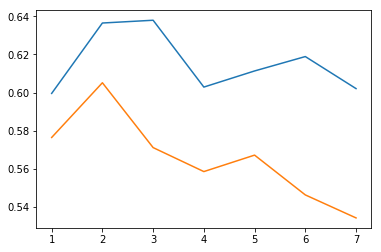

In [607]:
plt.plot([1,2,3,4,5,6,7],f1_3[:7])
plt.plot([1,2,3,4,5,6,7],f1_3[7:])